**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [19]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 6.09MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [20]:
df = pd.read_csv("nba_logreg.csv")


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [21]:
print("The shape of the dataset is:", df.shape)



The shape of the dataset is: (1340, 21)


**What are the columns?**

In [ ]:
#ENTER YOUR CODE HERE

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [22]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [23]:
df = df.dropna()
print("New shape after dropping NaNs:", df.shape)

New shape after dropping NaNs: (1329, 21)


**What is the shape of the dataframe now?**

The shape of the features dataframe is: (1329, 20)
The shape of the labels dataframe is: (1329,)


Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [24]:
X = df.drop("TARGET_5Yrs", axis=1)
y = df["TARGET_5Yrs"]

print("The shape of the features dataframe is:", X.shape)
print("The shape of the labels dataframe is:", y.shape)

The shape of the features dataframe is: (1329, 20)
The shape of the labels dataframe is: (1329,)


The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [25]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [26]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
split_ratio = len(X_train) / len(X_test)


print("The shape of training features dataframe is:", X_train.shape)
print("The shape of testing features dataframe is:", X_test.shape)
print("The shape of test labels dataframe is:", y_train.shape)
print("The train-to-test split ratio is:", y_test.shape)
print("The train-to-test split ratio is:", split_ratio)

The shape of training features dataframe is: (1063, 20)
The shape of testing features dataframe is: (266, 20)
The shape of test labels dataframe is: (1063,)
The train-to-test split ratio is: (266,)
The train-to-test split ratio is: 3.9962406015037595


The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [27]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [28]:

X = df.drop(columns=["Name", "TARGET_5Yrs"])
y = df["TARGET_5Yrs"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Now test on the testing dataframe and print all of these metrics.**

In [30]:

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7330827067669173
Precision: 0.7837837837837838
Recall: 0.8238636363636364
F1 Score: 0.8033240997229917


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [31]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [32]:

svm_model = SVC()


svm_model.fit(X_train, y_train)

SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


svm_predictions = svm_model.predict(X_test)
print("Accuracy of the model is:", accuracy_score(y_test, svm_predictions))
print("Precision of the model is:", precision_score(y_test, svm_predictions))
print("Recall of the model is:", recall_score(y_test, svm_predictions))
print("F1 score of the model is:", f1_score(y_test, svm_predictions))


Accuracy of the model is: 0.7443609022556391
Precision of the model is: 0.7872340425531915
Recall of the model is: 0.8409090909090909
F1 score of the model is: 0.8131868131868132


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### MULTICLASS CLASSIFICATION

In [34]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 26.0MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [35]:
import pandas as pd

social_df = pd.read_csv("social_well_being.csv")
social_df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


**Always analyse the data.**

In [36]:

print("Shape of dataset:", social_df.shape)

print("Column names:", social_df.columns.tolist())

social_df.head()

print("Missing values:\n", social_df.isnull().sum())

print("Data types:\n", social_df.dtypes)

social_df.describe()


Shape of dataset: (924, 10)
Column names: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']
Missing values:
 User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Data types:
 User_ID                        int64
Age                            int64
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
Likes_Received_Per_Day         int64
Comments_Received_Per_Day      int64
Messages_Sent_Per_Day          int64
Dominant_Emotion              object
dtype: object


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,498.937229,27.500000,96.309524,3.349567,40.246753,15.726190,22.595238
std,291.713692,3.941473,39.228274,1.940080,26.799196,8.933589,8.634295
min,1.000000,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,231.750000,24.000000,65.000000,2.000000,19.500000,8.000000,17.000000
50%,500.500000,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,731.250000,30.000000,120.000000,5.000000,55.000000,22.000000,28.000000
max,1000.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [37]:

print("The classes are:")
print(social_df["Dominant_Emotion"].unique())

The classes are:
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [38]:

categorical_cols = social_df.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(social_df[col].unique())


Column: Gender
['Female' 'Male' 'Non-binary']

Column: Platform
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']

Column: Dominant_Emotion
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [3]:
import pandas as pd

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [12]:
social_df = pd.read_csv("social_well_being.csv")

gender_encoded = pd.get_dummies(social_df['Gender'], prefix='Gender', drop_first=True)


social_df = social_df.drop('Gender', axis=1)

# Add the encoded columns back
social_df = pd.concat([social_df, gender_encoded], axis=1)


,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [ ]:
#ENTER YOUR CODE HERE

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [39]:
# One-hot encode the 'Platform' column (drop_first=True to avoid dummy variable trap)
platform_encoded = pd.get_dummies(social_df['Platform'], prefix='Platform', drop_first=True)

# Drop the original 'Platform' column
social_df = social_df.drop('Platform', axis=1)

# Concatenate the encoded platform columns back to the dataframe
social_df = pd.concat([social_df, platform_encoded], axis=1)

# Optional: preview the updated dataframe
print(social_df.head())


   User_ID  Age      Gender  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25      Female                         120              3   
1        2   30        Male                          90              5   
2        3   22  Non-binary                          60              2   
3        4   28      Female                         200              8   
4        5   33        Male                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  Platform_Instagram  Platform_LinkedIn  Platform_Snapchat  \


**Now label encode the column 'Dominant_Emotion'**

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Dominant_Emotion' column
social_df['Dominant_Emotion'] = le.fit_transform(social_df['Dominant_Emotion'])

# Optional: Check what each label maps to
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Map:\n", label_mapping)


Label Encoding Map:
 {'Anger': np.int64(0), 'Anxiety': np.int64(1), 'Boredom': np.int64(2), 'Happiness': np.int64(3), 'Neutral': np.int64(4), 'Sadness': np.int64(5)}


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [15]:
# Create features (X) and labels (y)
X = social_df.drop("Dominant_Emotion", axis=1)
y = social_df["Dominant_Emotion"]


The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier


**Train your model.**

In [41]:
# 1. Importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# 2. Creating a KNN model instance
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can tweak 'k' later if needed

# 3. Training the model using the training data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [42]:
# 1. Predicting the labels for the test data
y_pred = knn_model.predict(X_test)

# 2. Creating a DataFrame to compare actual vs predicted
prediction_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# 3. Printing the first few rows
print(prediction_df.head())


   Actual  Predicted
0     1.0        1.0
1     1.0        1.0
2     1.0        1.0
3     1.0        1.0
4     1.0        1.0


,Dominant_Emotion_Encoded_Predicted
0,5
1,5
2,1
3,1
4,4
...,...
180,4
181,1
182,5
183,3


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [46]:

y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

actual_labels = le.inverse_transform(y_test_int)
predicted_labels = le.inverse_transform(y_pred_int)

# Creating a prediction DataFrame
prediction_df = pd.DataFrame({
    'Actual': actual_labels,
    'Predicted': predicted_labels
})

# Showing results
print(prediction_df.head())


   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1


['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Converting y_test and y_pred to integers
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Accuracy
accuracy = accuracy_score(y_test_int, y_pred_int)

precision = precision_score(y_test_int, y_pred_int, average='weighted')
recall = recall_score(y_test_int, y_pred_int, average='weighted')
f1 = f1_score(y_test_int, y_pred_int, average='weighted')

# Printing results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7180451127819549
Precision: 0.7188201272411799
Recall: 0.7180451127819549
F1 Score: 0.718422348547385


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

# Converting y values to int
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Converting class names to strings to avoid TypeError
target_names = [str(label) for label in le.classes_]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_int, y_pred_int))

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test_int,
    y_pred_int,
    labels=le.transform(le.classes_),
    target_names=target_names,
    zero_division=0  # suppresses warnings for undefined precision/recall
))




Confusion Matrix:
[[ 53  37]
 [ 38 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59        90
           1       0.79      0.78      0.79       176
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.72       266
   macro avg       0.23      0.23      0.23       266
weighted avg       0.72      0.72      0.72       266



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [53]:
from sklearn.naive_bayes import GaussianNB


**Now instantiate and fit a model.**

In [54]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [55]:
nb_pred = nb_model.predict(X_test)

#Converting to integer
nb_pred_int = nb_pred.astype(int)
y_test_int = y_test.astype(int)

# Inversing transform predictions and actual values to get original emotion labels
nb_pred_labels = le.inverse_transform(nb_pred_int)
y_test_labels = le.inverse_transform(y_test_int)

# Creating and displaying the prediction DataFrame
nb_prediction_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': nb_pred_labels
})

# Showing the first few rows
print(nb_prediction_df.head())


   Actual  Predicted
0       1          1
1       1          0
2       1          1
3       1          0
4       1          1


**Finally, print the accuracy, confusion matrix and classification report.**

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# integer predictions
nb_pred_int = nb_pred.astype(int)
y_test_int = y_test.astype(int)

# Accuracy
nb_accuracy = accuracy_score(y_test_int, nb_pred_int)
print("Naive Bayes Accuracy:", nb_accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_int, nb_pred_int))

# Classification Report
target_names = [str(label) for label in le.classes_]

print("\nClassification Report:")
print(classification_report(
    y_test_int,
    nb_pred_int,
    labels=le.transform(le.classes_),
    target_names=target_names,
    zero_division=0
))



Naive Bayes Accuracy: 0.6127819548872181

Confusion Matrix:
[[79 11]
 [92 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.88      0.61        90
           1       0.88      0.48      0.62       176
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.61       266
   macro avg       0.22      0.23      0.20       266
weighted avg       0.74      0.61      0.61       266



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [131]:
from google.colab import files
uploaded = files.upload()

test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')


In [132]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

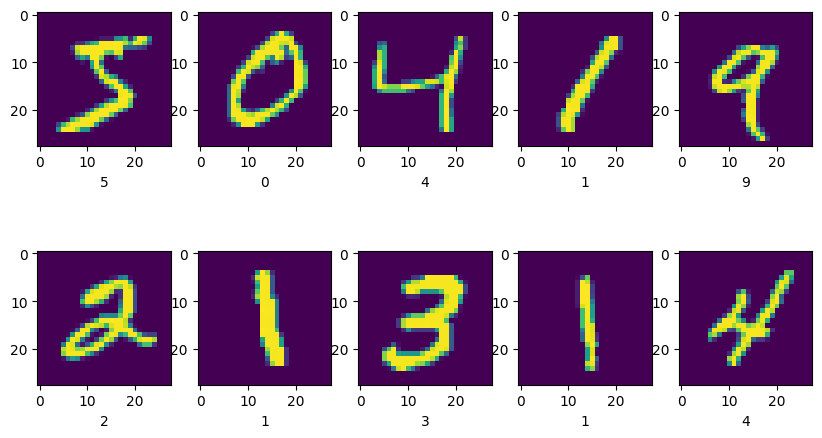

In [133]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [135]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}
    self.initial_params()


  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    return np.maximum(0, Z)

  def softmax(self, Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)


  def forward_propagation(self, X):
    # Implement the forward_propagation function
    self.activations['Z1'] = np.dot(self.weights_biases['W1'], X) + self.weights_biases['b1']
    self.activations['A1'] = self.RELU(self.activations['Z1'])

    for i in range(2, self.num_layers + 1):
        self.activations[f'Z{i}'] = np.dot(self.weights_biases[f'W{i}'], self.activations[f'A{i-1}']) + self.weights_biases[f'b{i}']
        self.activations[f'A{i}'] = self.RELU(self.activations[f'Z{i}'])

    self.activations[f'Z{self.num_layers + 1}'] = np.dot(self.weights_biases[f'W{self.num_layers + 1}'], self.activations[f'A{self.num_layers}']) + self.weights_biases[f'b{self.num_layers + 1}']
    self.activations[f'A{self.num_layers + 1}'] = self.softmax(self.activations[f'Z{self.num_layers + 1}'])

    return self.activations[f'A{self.num_layers + 1}'] # Return the final output activation


  def one_hot_encode(self, y):
    # Implement one hot encoding
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y


  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    # This would typically be cross-entropy loss for classification
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(y_pred + 1e-9)) / m # Add a small epsilon to prevent log(0)
    return loss

  def backward_prop(self, y_pred, Y, X):
    m = X.shape[1]
    one_hot_Y = self.one_hot_encode(Y)
    gradients = {}

    dZ_last = y_pred - one_hot_Y
    gradients[f'dW{self.num_layers + 1}'] = np.dot(dZ_last, self.activations[f'A{self.num_layers}'].T) / m
    gradients[f'db{self.num_layers + 1}'] = np.sum(dZ_last, axis=1, keepdims=True) / m

    for i in range(self.num_layers, 0, -1):
        dA_prev = np.dot(self.weights_biases[f'W{i+1}'].T, dZ_last)
        dZ_curr = dA_prev * (self.activations[f'Z{i}'] > 0)  # ReLU derivative
        A_prev = self.activations[f'A{i-1}'] if i > 1 else X
        gradients[f'dW{i}'] = np.dot(dZ_curr, A_prev.T) / m
        gradients[f'db{i}'] = np.sum(dZ_curr, axis=1, keepdims=True) / m
        dZ_last = dZ_curr

    return gradients


  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):
    self.initial_params()
    for i in range(num_iterations):
        y_pred = self.forward_propagation(X)
        gradients = self.backward_prop(y_pred, y, X)
        self.update_params(gradients)

        if i % 100 == 0:
            loss = self.total_loss(y_pred, self.one_hot_encode(y))
            print(f"Iteration {i}, Loss: {loss}")



  def predict(self, X):
        # Only return the predictions, not the intermediate activation A
        A = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
        return predictions

In [137]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=1000)


Iteration 0, Loss: 13.83952087497783
Iteration 100, Loss: 0.6756775849398249
Iteration 200, Loss: 0.48564879700214253
Iteration 300, Loss: 0.43307915866941543
Iteration 400, Loss: 0.3262147307855302
Iteration 500, Loss: 0.28813988385758066
Iteration 600, Loss: 0.26790040318241515
Iteration 700, Loss: 0.24461059347713485
Iteration 800, Loss: 0.22552536571204443
Iteration 900, Loss: 0.21288290978468197


In [138]:
class ANN :
    def forward_propagation(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.softmax(Z2)
        return A2, A1
def predict(self, X):
    A2, _ = self.forward_propagation(X)   # make sure this works
    predictions = np.argmax(A2, axis=0)
    return predictions





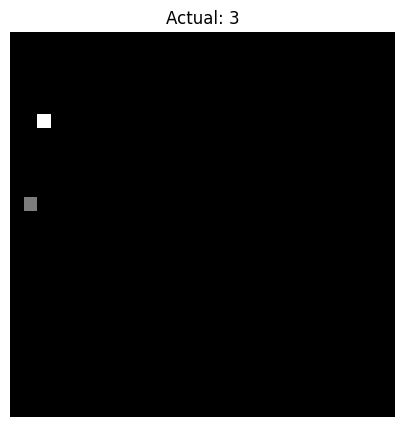

In [141]:
import matplotlib.pyplot as plt
import numpy as np





# STEP 1: Get predictions
m = model.predict(x_test)     # Predicted labels
d = np.array(y_test)          # Actual labels (ground truth)

# STEP 2: Reshape test images
X_test_reshaped = x_test.values.reshape(-1, 28, 28)  # if x_test is a DataFrame

# STEP 3: Pick an index and visualize
i = 500
plt.figure(figsize=(5, 5))
plt.imshow(X_test_reshaped[i], cmap='gray')

# Show prediction and actual
plt.xlabel(f"Predicted: {m[i]}")
plt.title(f"Actual: {d[i]}")
plt.axis('off')
plt.show()
